# Synthetic data example
In this note, we plot results from a synthetic data example, with unmeasured confounding. We use this to motivate our methodology  
$X_0 \sim \mathcal{N}(0,1)$  
$U \sim Bern(p)$  
$A \mid U=1 \sim Bern(0.8)$  
$A \mid U=0 \sim Bern(0.05)$  
$X_t(a) = X_{t-1}(a) + 1(a=1)(1(u=1)\beta_1 + 1(u=0)\beta_2) + \epsilon_t$  

In [1184]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [1185]:
beta_1 = 3.5
beta_2 = 0

n=100000
T = 61
t_act = 31

def x_t(a_t, x_prev, u, t):
    return x_prev + (a_t==1)*(beta_1*(u==1) + beta_2*(u==0)) + np.random.normal(0, 1.5, x_prev.shape[0])


In [1186]:
def action(u):
    return np.random.binomial(1, 0.9, size=u.shape[0])*(u==1) + np.random.binomial(1, 0.05, size=u.shape[0])*(u==0)


In [1187]:
data = pd.DataFrame()

data['U'] = np.random.binomial(1, 0.1, size=n)
data['X_0'] = np.random.normal(50, 1, size=n)

for t in range(1, T):
    if t < t_act:
        data[f'X_{t}'] = x_t(a_t=0, x_prev=np.array(data[f'X_{t-1}']), u=np.array(data['U']), t=t)
    if t == t_act:
        data[f'A'] = action(np.array(data['U']))
    if t >= t_act:
        data[f'X_{t}'] = x_t(a_t=np.array(data[f'A']), x_prev=np.array(data[f'X_{t-1}']), u=np.array(data['U']), t=t)
        

In [1188]:
data

,U,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60
0,0,49.034499,48.031958,46.541684,46.930994,43.670713,42.692651,43.943119,43.902916,47.989449,...,24.415986,22.907025,25.005151,24.810538,26.696564,25.117838,25.123451,27.096915,27.665548,27.301391
1,0,49.432046,49.420614,47.872539,50.267343,50.553071,54.134660,52.721522,49.662754,49.029274,...,44.117598,44.175933,43.501378,42.598798,40.985961,38.917540,38.986573,41.029958,40.941041,44.129189
2,0,50.109134,50.141838,51.956583,53.280454,54.219079,52.570940,53.704759,55.157496,53.378755,...,43.871850,43.301643,43.614975,45.379291,47.210398,48.611363,48.225392,48.830215,47.978644,48.085227
3,0,47.590197,48.612802,49.317392,51.116705,52.603956,50.339304,46.691124,46.183366,45.592635,...,45.048175,44.545083,43.754201,43.436435,43.591484,43.506789,45.322899,44.480494,46.575487,48.645490
4,0,49.486559,49.807088,48.639241,45.718350,45.642341,44.755116,46.128050,43.719870,42.005971,...,37.415878,37.186661,37.042116,37.184957,39.212095,40.625245,39.533668,38.288527,38.202930,36.996283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,47.846372,46.406694,49.529105,51.750789,52.011179,52.597804,52.284715,51.290274,51.348426,...,63.691918,64.275905,64.364888,63.722366,63.393427,65.611341,65.300335,65.143632,66.895643,70.040009
99996,0,49.837107,49.733886,49.854740,50.506276,52.376962,51.903394,50.384288,51.120166,52.448748,...,32.163486,31.819729,35.103301,36.481328,36.182080,39.332719,39.807359,38.873683,36.867604,39.680909
99997,0,50.095838,47.686019,47.353133,47.984951,46.726551,47.178305,47.226294,49.086507,48.527279,...,57.134922,57.333248,58.203698,58.141033,60.834652,61.427265,62.438247,64.188715,64.802598,64.559460
99998,0,50.981634,51.275757,54.222829,54.502336,56.973189,57.171688,56.574007,55.825106,55.559785,...,58.871025,58.510825,61.157564,61.577768,59.498270,60.537774,60.428656,61.622753,64.815849,64.496812


In [1189]:
data_subset = data.loc[data['A']==1]

In [1190]:
import matplotlib.pyplot as plt

In [1191]:
mean_obs = [] 
q05_obs = []
q95_obs = []
for t in range(T):
    mean_obs.append(data_subset[f'X_{t}'].mean())
    q05_obs.append(data_subset[f'X_{t}'].quantile(0.05))
    q95_obs.append(data_subset[f'X_{t}'].quantile(0.95))

In [1192]:
interventional_data = data.loc[:,['U', 'X_0']]

for t in range(1, T):
    if t < t_act:
        interventional_data[f'X_{t}'] = x_t(a_t=0, x_prev=np.array(interventional_data[f'X_{t-1}']), u=np.array(interventional_data['U']), t=t)
    if t == t_act:
        interventional_data[f'A'] = 1
    if t >= t_act:
        interventional_data[f'X_{t}'] = x_t(a_t=np.array(interventional_data[f'A']), x_prev=np.array(interventional_data[f'X_{t-1}']), u=np.array(interventional_data['U']), t=t)
        

In [1193]:
mean_int = [] 
q05_int = []
q95_int = []
for t in range(T):
    mean_int.append(interventional_data[f'X_{t}'].mean())
    q05_int.append(interventional_data[f'X_{t}'].quantile(0.05))
    q95_int.append(interventional_data[f'X_{t}'].quantile(0.95))

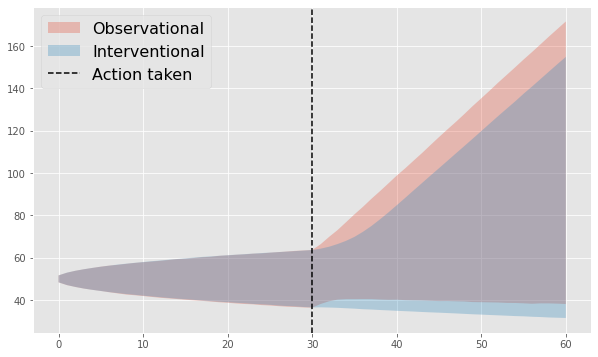

In [1194]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.fill_between(range(T), q05_obs, q95_obs, alpha=0.3, label='Observational')
plt.fill_between(range(T), q05_int, q95_int, alpha=0.3, label='Interventional')
plt.axvline(t_act-1, color='k', linestyle='--', label='Action taken')
plt.legend(loc='upper left', fontsize=16)


149it [00:01, 82.54it/s]
149it [00:02, 71.73it/s]


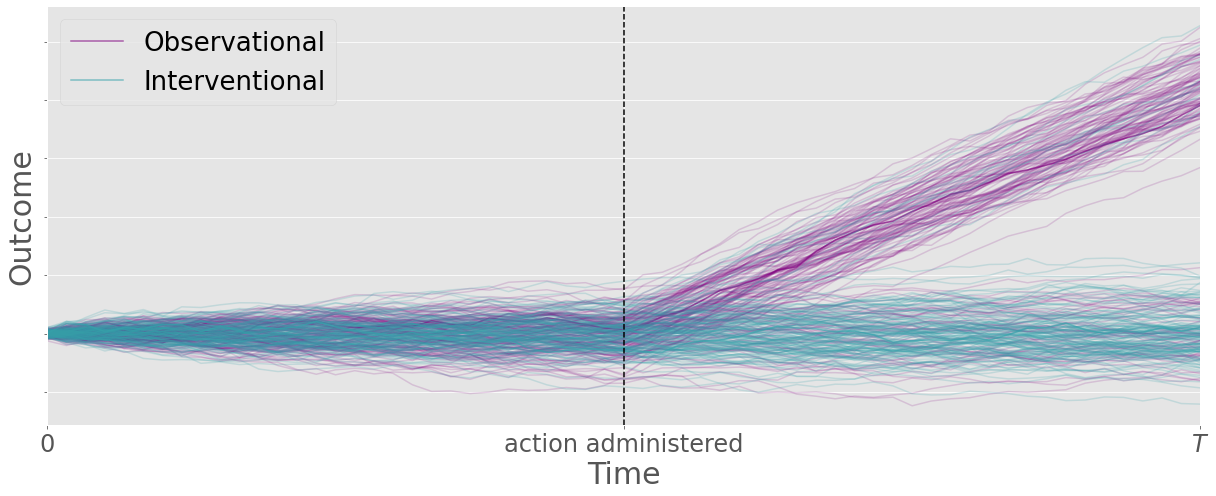

In [1217]:
import seaborn as sns
fig, axs = plt.subplots(1, 1, figsize=(17,7))
plt.style.use('ggplot')
# sns.color_palette("mako", 10)[6],
max_count = 150
i=0
for index, row in tqdm(data_subset.iterrows()):
    i += 1
    plt.plot(range(T), row[[f'X_{t}' for t in range(T)]], color='purple', alpha=0.16)
    if i == max_count:
        plt.plot(range(T), row[[f'X_{t}' for t in range(T)]], color='purple', alpha=0.6, label='Observational')
        break

i=0        
for index, row in tqdm(interventional_data.iterrows()):
    i += 1
    plt.plot(range(T), row[[f'X_{t}' for t in range(T)]], color=sns.color_palette("mako", 10)[6], alpha=0.2)
    if i == max_count:
        plt.plot(range(T), row[[f'X_{t}' for t in range(T)]], color=sns.color_palette("mako", 10)[6], alpha=0.6, label='Interventional')
        break

plt.axvline(t_act-1, color='k', linestyle='--')
plt.legend(loc='upper left', fontsize=26)
plt.xlim([0, 60])

axs.set_xticks([0, t_act-1, 60])
axs.set_yticklabels([])
axs.set_xticklabels(['$0$', 'action administered', '$T$'])
axs.tick_params(axis='both', which='major', labelsize=24)
axs.tick_params(axis='both', which='minor', labelsize=24)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Outcome', fontsize=30)
plt.tight_layout()

plt.savefig("/data/localhost/not-backed-up/taufiq/HypothesisTesting/hyp_testing_new_pulse_data_2/images/synthetic_example_v4.pdf", format='pdf', bbox_inches='tight')
